# Linear Error-in-Variables Mixture Model

Reproduction of examples from section 4 in the original paper; the main aim is to compare the treelet transform with PCA.The task at hand is the recovery of the unobserved structure of the mixture model from a random sample. 

## Setup

In [1]:
import matplotlib.pyplot as plt
from scipy.linalg import block_diag
import numpy as np 
import pandas as pd
import sys
import os

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
sys.path.append("../scripts")
import python_treelet_implementation as pytree
import test_treelets_mixture_models as ttmm
import utils

## Model setup

The paper considers a sample $\left \{ \vec{x}_i,y_i \right \}_{i=1}^{n}$ where each multivariate observation $\vec{x} \in \mathbb{R}^p$ has the form $\vec{x} = \sum_{i=}^{K}u_j \vec{v}_j + \sigma \vec{z}$ and each component corresponds to:

* factors: $\left ( u_1, ... u_k \right )^T \sim F_{u_1,...,u_K}$
* loading vectors: $\vec{v}_j$ 
* noise: $\vec{z} \sim \mathcal{N}_p\left ( 0, I \right )$

The response variable has the form $y = \sum_{i=1}^{K}\alpha_j u_j + \epsilon$, where: 

* factor weights: $\alpha_j$ 
* noise: $\epsilon \sim \text{i.i.d}\left ( 0, \sigma_\epsilon^2 \right )$ 

## Uncorrelated factors and non-overlapping loading vectors 

Data is simulated according to example 1 and re-scaled to have mean 0 and variance 1. 

In [66]:
X = ttmm.linear_mixture_model(V = np.array([[1,1,1,0,0,0,0,0,0],
                                            [0,0,0,1,1,1,1,0,0],
                                            [0,0,0,0,0,0,0,1,1]])\
                                    .transpose(),
                         C = .5*np.identity(3), 
                         sigma = .1, 
                         n = 50)

In [67]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Sample covaraince matrix exhibits block structure as required and expected. 

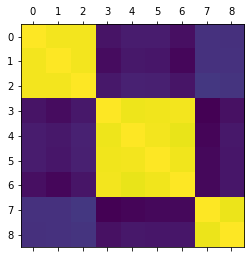

In [68]:
plt.matshow(np.cov(X.transpose()))

Performing PCA and examining the absolute loadings for the first three components the factor structure is apparent. 

In [69]:
pca = PCA(n_components=3)
pca.fit(X)
loadings = pca.components_.T 
loadings

array([[-0.02828456,  0.56519376,  0.11419933],
       [-0.03777111,  0.56551259,  0.11235403],
       [-0.02082328,  0.56745464,  0.10107104],
       [ 0.49950496,  0.02229865, -0.01496883],
       [ 0.49671961,  0.04072834, -0.02240366],
       [ 0.49914924,  0.04014322, -0.02471338],
       [ 0.49833397,  0.0170142 , -0.03184736],
       [-0.05306981,  0.13193419, -0.69192381],
       [-0.02830232,  0.13146535, -0.69498933]])

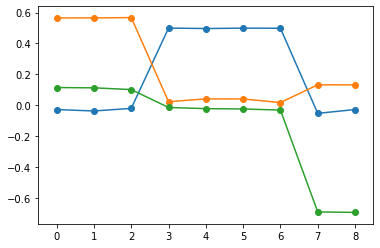

In [70]:
p,l = loadings.shape
for l in range(l): 
    plt.scatter(np.arange(p),loadings[:,l])
    plt.plot(np.arange(p),loadings[:,l])

In [60]:
tree = pytree.treelet_decomposition(X = X,
                             L = 9)
loadings = pytree.best_basis(tree,3,X)[0]["basis"]
loadings

array([[0.5775939 , 0.        , 0.        ],
       [0.5775939 , 0.        , 0.        ],
       [0.5768627 , 0.        , 0.        ],
       [0.        , 0.50040328, 0.        ],
       [0.        , 0.49943928, 0.        ],
       [0.        , 0.50040328, 0.        ],
       [0.        , 0.49975345, 0.        ],
       [0.        , 0.        , 0.70710678],
       [0.        , 0.        , 0.70710678]])

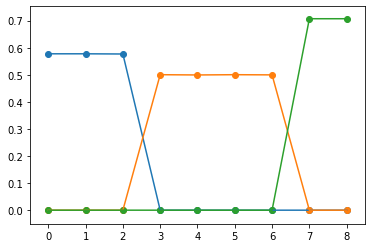

In [59]:
p,l = loadings.shape
for l in range(l): 
    plt.scatter(np.arange(p),loadings[:,l])
    plt.plot(np.arange(p),loadings[:,l])

array([[0.5775939 , 0.        , 0.        ],
       [0.5775939 , 0.        , 0.        ],
       [0.5768627 , 0.        , 0.        ],
       [0.        , 0.50040328, 0.        ],
       [0.        , 0.49943928, 0.        ],
       [0.        , 0.50040328, 0.        ],
       [0.        , 0.49975345, 0.        ],
       [0.        , 0.        , 0.70710678],
       [0.        , 0.        , 0.70710678]])

In [85]:
A = B = C = np.ones((2,2))
noise = np.random.normal(0,1,6*6).reshape(6,6)
noisy_matrix = block_diag(A,B,C) + .2*np.eye(6) + 0.01*noise
tree = pytree.treelet_decomposition(X = X,
                                    L = 6
                                   )

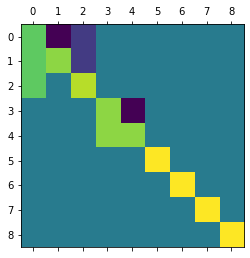

In [86]:
plt.matshow(tree[3]["B"])

In [77]:
loadings = np.abs(np.real(np.linalg.eig(noisy_matrix)[1]))

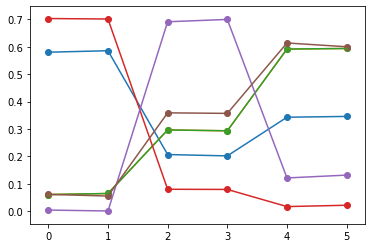

In [78]:
p,l = loadings.shape

for l in range(l): 
    plt.scatter(np.arange(p),loadings[:,l])
    plt.plot(np.arange(p),loadings[:,l])

In [72]:
loadings

array([[ 0.70710678, -0.70710678,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.70710678,  0.70710678,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.70710678, -0.70710678,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.70710678,  0.70710678,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.70710678,
        -0.70710678],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.70710678,
         0.70710678]])

In [80]:
X = ttmm.linear_mixture_model(V = np.array([[1,1,1,0,0,0,0,0,0],
                                            [0,0,0,1,1,1,1,0,0],
                                            [0,0,0,0,0,0,0,1,1]])\
                                    .transpose(),
                         C = .2*np.identity(3), 
                         sigma = 0, 
                         n = 100)

In [81]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [82]:
C = np.cov(X, rowvar = False)